## Preprocessing the data

Methods: 
-   Feature Selection : Rain, Temp, RH, Wind Speed, Dew Point, Pressure
-   Interquartile Range (IQR) : Select all data between 2.7 standard deviations in the Gaussian distribution of the data (Except rainfall)
-   Removal of missing data (2.5% of the total data was missing)
-   Converted date and time to a usable periodic signal (sine and cosine)

Output: Processed weather data of the selected features from 1/1/2020 to 12/7/2024 (Shivajinagar)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
filepath = "D:\Anshul\Code\IMD\Data\Shivajinagar\MAHARASHTRA_PUNE_CAGMO_SHIVAJINAGAR_18.5386_73.842_559.0_2018-01-01_2024-07-12_AWS.csv"
df = pd.read_csv(filepath)
df

,DATE,TIME(UTC),RAIN_HOURLY(mm),RAIN_DAILY(mm),TEMP(C),TEMP_MIN(C),TEMP_MAX(C),TEMP_MIN_MAX_DAY(C),DEW_POINT(C),RH(%),RH_MIN_MAX_DAY(%),WIND_DIR_10m(deg),WIND_SPEED_10m(kt),WIND_MAX/GUST_10m(kt),SLP(hPa),MSLP(hPa),SUNSHINE(HH:MM),Unnamed: 17
0,2018-01-01,5:00:00,0.0,0.0,25.4,21.9,25.3,NaN,16.6,58.0,NaN,124.0,1.0,NaN,952.8,1015.1,2.16,NaN
1,2018-01-01,6:00:00,0.0,0.0,27.1,25.4,27.7,NaN,15.8,50.0,NaN,277.0,2.0,NaN,952.2,1014.1,3.16,NaN
2,2018-01-01,7:00:00,0.0,0.0,28.9,27.0,29.3,NaN,14.0,40.0,NaN,230.0,3.0,NaN,950.8,1012.3,4.16,NaN
3,2018-01-01,8:00:00,0.0,0.0,29.0,28.7,29.2,NaN,15.2,43.0,NaN,352.0,3.0,NaN,949.5,1010.9,5.16,NaN
4,2018-01-01,9:00:00,0.0,0.0,30.0,28.7,30.3,NaN,15.0,40.0,NaN,340.0,2.0,NaN,948.4,1009.5,6.16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163776,2024-07-12,4:00:00,NaN,0.0,26.8,26.7,27.5,NaN,24.6,88.0,NaN,290.0,4.0,10.0,943.0,1004.4,NaN,NaN
163777,2024-07-12,4:15:00,NaN,0.0,27.7,26.7,27.9,NaN,24.5,83.0,NaN,285.0,6.0,9.0,943.0,1004.2,NaN,NaN
163778,2024-07-12,4:30:00,NaN,0.0,27.5,26.7,28.0,NaN,24.3,83.0,NaN,278.0,5.0,10.0,943.0,1004.2,NaN,NaN
163779,2024-07-12,4:45:00,NaN,0.0,27.5,26.7,28.0,NaN,24.3,83.0,NaN,281.0,5.0,11.0,943.0,1004.2,NaN,NaN


In [5]:
sns.set_theme()

In [6]:
df.index = pd.to_datetime(df['DATE'] + " " + df['TIME(UTC)'], format='%Y-%m-%d %H:%M:%S')
df = df.drop(columns=['DATE', 'TIME(UTC)'])
df = df[df.index > datetime.datetime(2020, 1, 1)]
df

,RAIN_HOURLY(mm),RAIN_DAILY(mm),TEMP(C),TEMP_MIN(C),TEMP_MAX(C),TEMP_MIN_MAX_DAY(C),DEW_POINT(C),RH(%),RH_MIN_MAX_DAY(%),WIND_DIR_10m(deg),WIND_SPEED_10m(kt),WIND_MAX/GUST_10m(kt),SLP(hPa),MSLP(hPa),SUNSHINE(HH:MM),Unnamed: 17
2020-01-01 00:30:00,NaN,0.0,11.4,11.4,24.8,NaN,11.0,98.0,NaN,137.0,1.0,NaN,948.7,1013.9,NaN,NaN
2020-01-01 00:45:00,NaN,0.0,11.4,11.3,24.8,NaN,11.0,98.0,NaN,165.0,1.0,NaN,949.0,1014.2,NaN,NaN
2020-01-01 01:00:00,NaN,0.0,11.4,11.3,24.8,NaN,11.0,98.0,NaN,182.0,0.0,NaN,949.4,1014.7,NaN,NaN
2020-01-01 01:15:00,NaN,0.0,11.1,11.1,24.8,NaN,10.7,98.0,NaN,194.0,0.0,NaN,949.5,1014.9,NaN,NaN
2020-01-01 01:30:00,NaN,0.0,11.2,11.1,24.8,NaN,10.8,98.0,NaN,354.0,0.0,NaN,949.7,1015.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12 04:00:00,NaN,0.0,26.8,26.7,27.5,NaN,24.6,88.0,NaN,290.0,4.0,10.0,943.0,1004.4,NaN,NaN
2024-07-12 04:15:00,NaN,0.0,27.7,26.7,27.9,NaN,24.5,83.0,NaN,285.0,6.0,9.0,943.0,1004.2,NaN,NaN
2024-07-12 04:30:00,NaN,0.0,27.5,26.7,28.0,NaN,24.3,83.0,NaN,278.0,5.0,10.0,943.0,1004.2,NaN,NaN
2024-07-12 04:45:00,NaN,0.0,27.5,26.7,28.0,NaN,24.3,83.0,NaN,281.0,5.0,11.0,943.0,1004.2,NaN,NaN


In [7]:
df.isna().sum()

RAIN_HOURLY(mm)          150257
RAIN_DAILY(mm)              531
TEMP(C)                       3
TEMP_MIN(C)                  46
TEMP_MAX(C)                  17
TEMP_MIN_MAX_DAY(C)      147055
DEW_POINT(C)                  7
RH(%)                         8
RH_MIN_MAX_DAY(%)        150257
WIND_DIR_10m(deg)            14
WIND_SPEED_10m(kt)           14
WIND_MAX/GUST_10m(kt)     25854
SLP(hPa)                    439
MSLP(hPa)                   439
SUNSHINE(HH:MM)          150257
Unnamed: 17              150257
dtype: int64

In [8]:
cols = ['RAIN_DAILY(mm)', 'TEMP(C)', 'DEW_POINT(C)', 'RH(%)', 'WIND_SPEED_10m(kt)', 'SLP(hPa)', 'MSLP(hPa)']
df = df[cols]
df

,RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa)
2020-01-01 00:30:00,0.0,11.4,11.0,98.0,1.0,948.7,1013.9
2020-01-01 00:45:00,0.0,11.4,11.0,98.0,1.0,949.0,1014.2
2020-01-01 01:00:00,0.0,11.4,11.0,98.0,0.0,949.4,1014.7
2020-01-01 01:15:00,0.0,11.1,10.7,98.0,0.0,949.5,1014.9
2020-01-01 01:30:00,0.0,11.2,10.8,98.0,0.0,949.7,1015.0
...,...,...,...,...,...,...,...
2024-07-12 04:00:00,0.0,26.8,24.6,88.0,4.0,943.0,1004.4
2024-07-12 04:15:00,0.0,27.7,24.5,83.0,6.0,943.0,1004.2
2024-07-12 04:30:00,0.0,27.5,24.3,83.0,5.0,943.0,1004.2
2024-07-12 04:45:00,0.0,27.5,24.3,83.0,5.0,943.0,1004.2


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

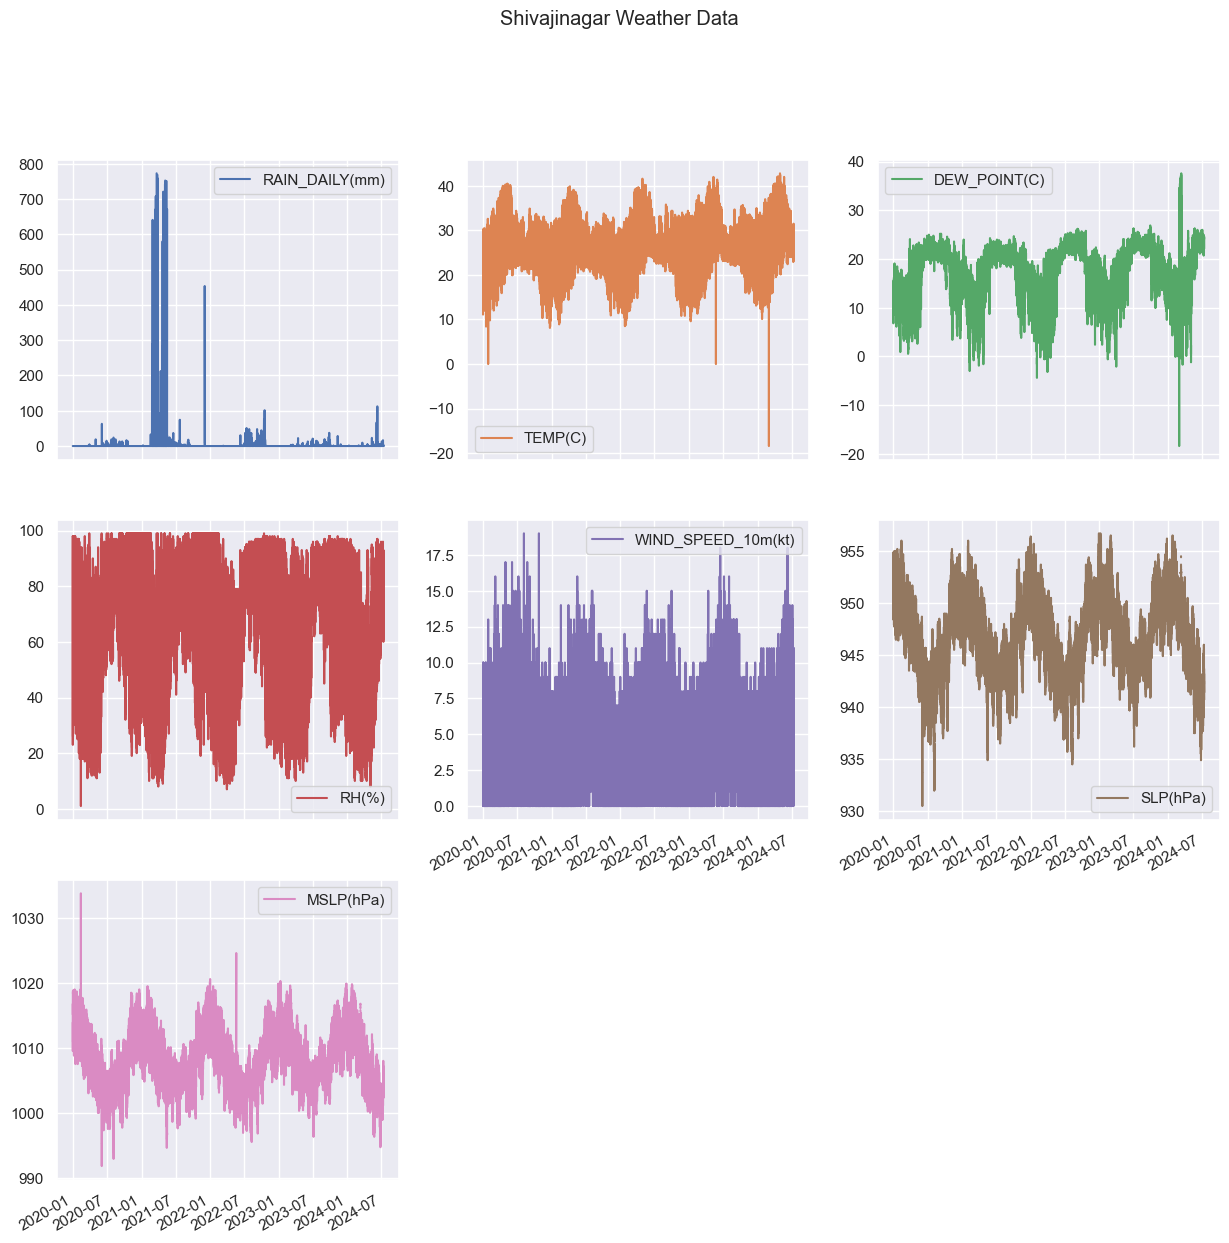

In [9]:
df.plot(y=cols, subplots=True, layout=(3, 3), figsize=(15, 15), title="Shivajinagar Weather Data")

### Slicing Data to remove outliers except for rainfall column

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

ndf = df[(df >= lower) & (df <= upper)]
ndf['RAIN_DAILY(mm)'] = df['RAIN_DAILY(mm)']
ndf

,RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa)
2020-01-01 00:30:00,0.0,NaN,11.0,98.0,1.0,948.7,1013.9
2020-01-01 00:45:00,0.0,NaN,11.0,98.0,1.0,949.0,1014.2
2020-01-01 01:00:00,0.0,NaN,11.0,98.0,0.0,949.4,1014.7
2020-01-01 01:15:00,0.0,NaN,10.7,98.0,0.0,949.5,1014.9
2020-01-01 01:30:00,0.0,NaN,10.8,98.0,0.0,949.7,1015.0
...,...,...,...,...,...,...,...
2024-07-12 04:00:00,0.0,26.8,24.6,88.0,4.0,943.0,1004.4
2024-07-12 04:15:00,0.0,27.7,24.5,83.0,6.0,943.0,1004.2
2024-07-12 04:30:00,0.0,27.5,24.3,83.0,5.0,943.0,1004.2
2024-07-12 04:45:00,0.0,27.5,24.3,83.0,5.0,943.0,1004.2


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

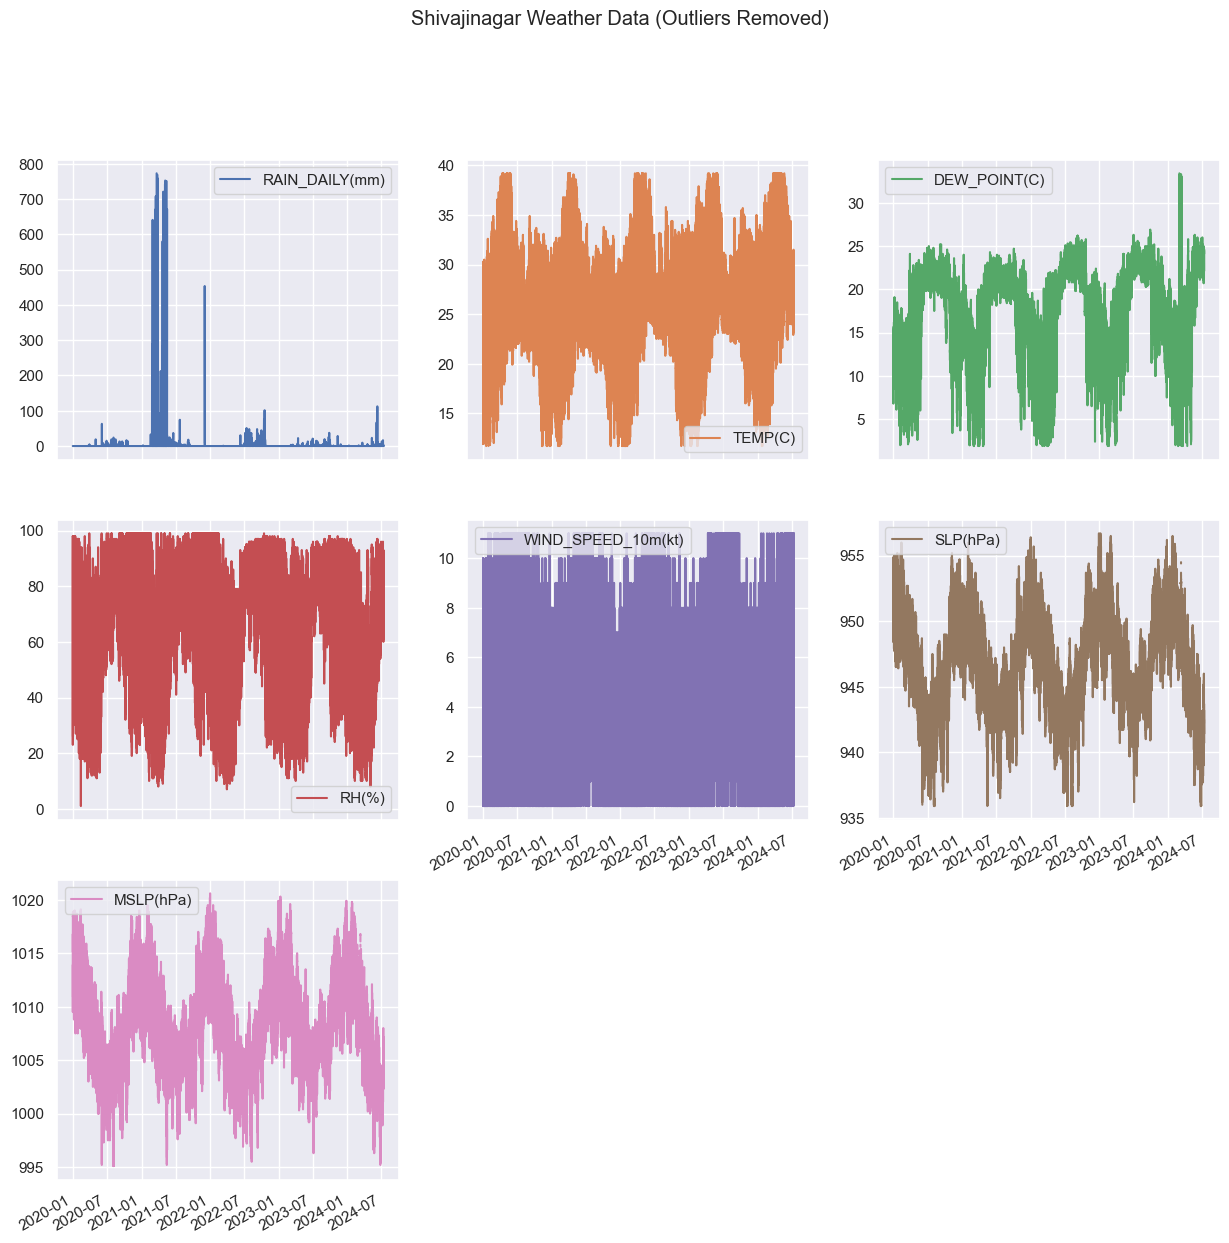

In [11]:
ndf.plot(y=cols, subplots=True, layout=(3, 3), figsize=(15, 15), title="Shivajinagar Weather Data (Outliers Removed)")

In [12]:
ndf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RAIN_DAILY(mm),149726.0,3.222773,30.269350,0.0,0.0,0.0,0.0,773.0
TEMP(C),148802.0,25.239860,5.527329,11.7,22.0,25.0,28.9,39.2
DEW_POINT(C),149725.0,17.384469,4.986366,1.9,13.8,18.6,21.6,33.4
RH(%),150249.0,67.183069,24.050653,1.0,49.0,72.0,89.0,99.0
WIND_SPEED_10m(kt),149537.0,3.116413,2.466512,0.0,1.0,3.0,5.0,11.0
SLP(hPa),149430.0,946.709481,3.663369,935.9,944.0,946.9,949.5,956.7
MSLP(hPa),149716.0,1008.676958,4.469675,995.1,1005.4,1008.4,1012.3,1020.6


In [13]:
ndf.isna().sum() * 100/ len(ndf)

RAIN_DAILY(mm)        0.353395
TEMP(C)               0.968341
DEW_POINT(C)          0.354060
RH(%)                 0.005324
WIND_SPEED_10m(kt)    0.479179
SLP(hPa)              0.550390
MSLP(hPa)             0.360050
dtype: float64

#### Missing data in all columns is less than 1%. Hence we will remove it.

In [14]:
old_shape = ndf.shape

In [15]:
ndf.dropna(inplace=True)    
new_shape = ndf.shape

In [16]:
(old_shape[0] - new_shape[0]) * 100/ old_shape[0] 

2.594221899811656

#### We removed 2.5% of the total data 

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

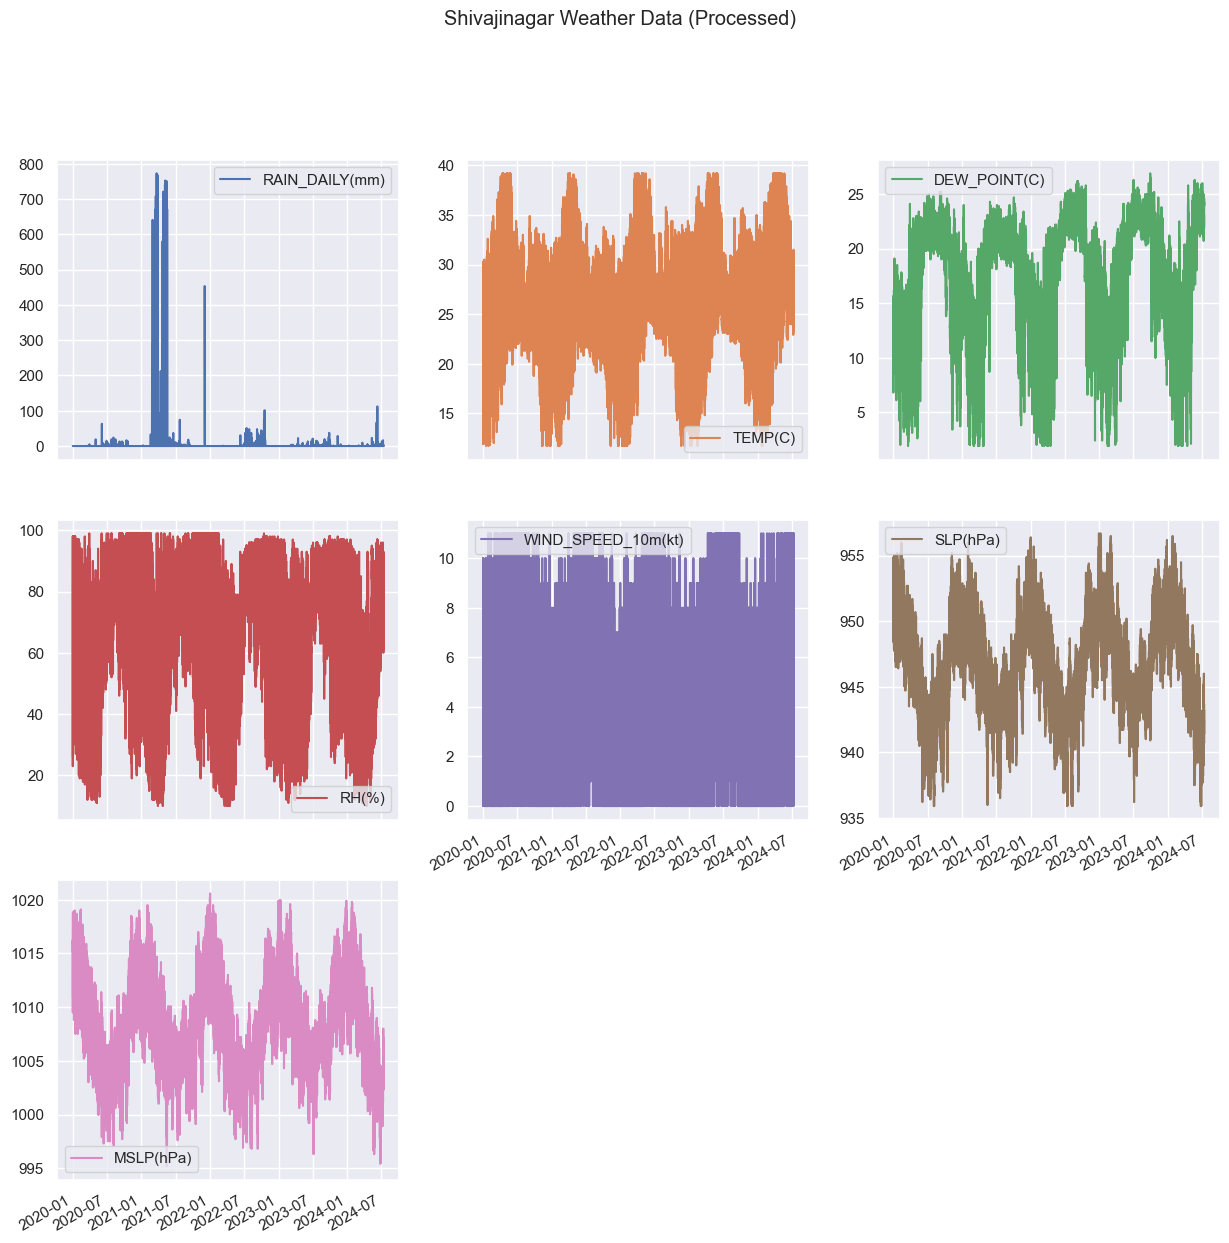

In [17]:
ndf.plot(y=cols, subplots=True, layout=(3, 3), figsize=(15, 15), title="Shivajinagar Weather Data (Processed)")

#### The date and time are useful for prediction but not in string format, hence we convert the date and time to a periodic signal such as sine and cosine

In [34]:
day = 24*60*60
year = (365.2425)*day
seconds = (ndf.index - ndf.index[0]).total_seconds() 
ndf['Day sin'] = np.sin(seconds * (2 * np.pi / day))
ndf['Day cos'] = np.cos(seconds * (2 * np.pi / day))
ndf['Year sin'] = np.sin(seconds * (2 * np.pi / year))
ndf['Year cos'] = np.cos(seconds * (2 * np.pi / year))
ndf

,RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa),Day sin,Day cos,Year sin,Year cos
2020-01-01 02:15:00,0.0,11.9,11.5,98.0,0.0,950.7,1015.9,0.000000,1.000000,0.000000,1.000000
2020-01-01 02:30:00,0.0,12.4,12.0,98.0,0.0,951.0,1016.1,0.065403,0.997859,0.000179,1.000000
2020-01-01 02:45:00,0.0,13.7,13.3,98.0,1.0,951.2,1016.1,0.130526,0.991445,0.000358,1.000000
2020-01-01 03:00:00,0.0,15.0,14.3,96.0,1.0,951.5,1016.1,0.195090,0.980785,0.000538,1.000000
2020-01-01 03:15:00,0.0,16.7,13.8,83.0,1.0,951.9,1016.1,0.258819,0.965926,0.000717,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12 04:00:00,0.0,26.8,24.6,88.0,4.0,943.0,1004.4,0.442289,0.896873,-0.179338,-0.983787
2024-07-12 04:15:00,0.0,27.7,24.5,83.0,6.0,943.0,1004.2,0.500000,0.866025,-0.179515,-0.983755
2024-07-12 04:30:00,0.0,27.5,24.3,83.0,5.0,943.0,1004.2,0.555570,0.831470,-0.179691,-0.983723
2024-07-12 04:45:00,0.0,27.5,24.3,83.0,5.0,943.0,1004.2,0.608761,0.793353,-0.179867,-0.983691


array([<Axes: >, <Axes: >], dtype=object)

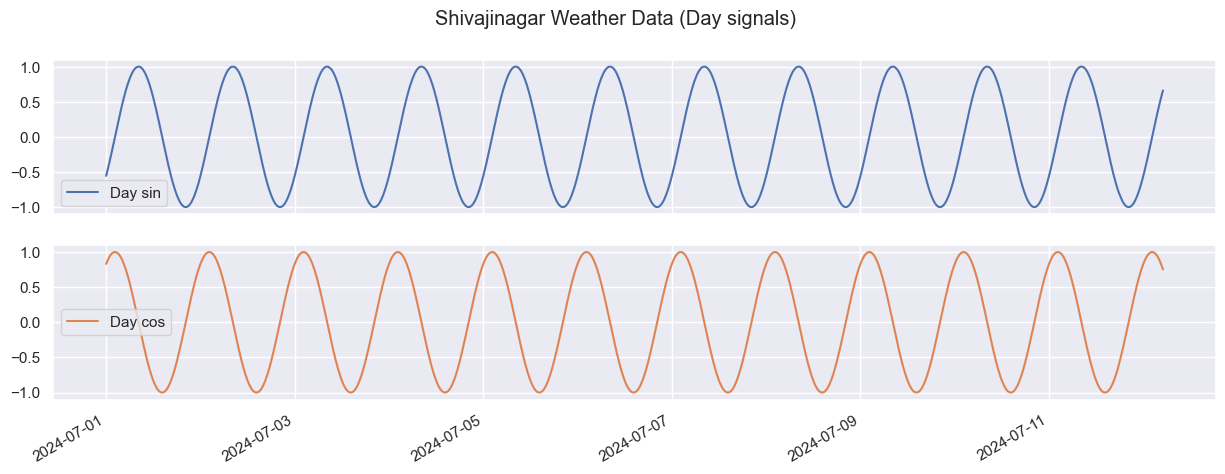

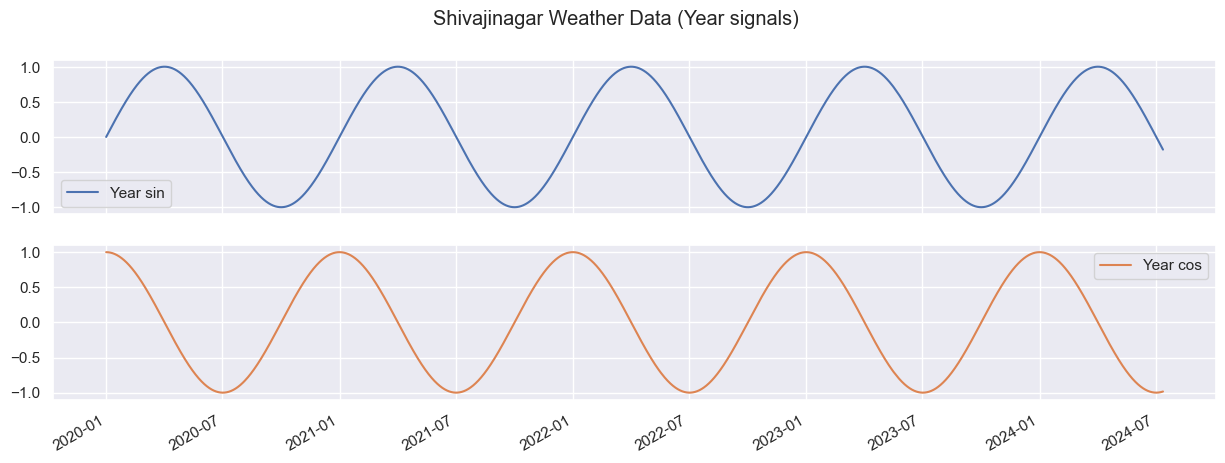

In [38]:
ndf[datetime.datetime(2024, 7, 1):].plot(y=['Day sin', 'Day cos'], subplots=True, figsize=(15, 5), title="Shivajinagar Weather Data (Day signals)")
ndf.plot(y=['Year sin', 'Year cos'], subplots=True, figsize=(15, 5), title="Shivajinagar Weather Data (Year signals)")

In [39]:
ndf.to_csv("D:\Anshul\Code\IMD\Data\Shivajinagar\Shivajinagar Cleaned Data.csv")